In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_50545/1666600989.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Data cleaning

In [2]:
# read csv data
df = pd.read_csv('csv/data.csv')

# Drop duplicate rows
df = df.drop_duplicates()

# Delete rows where sex_of_casualty column has values other than 1 or 2
df = df[(df['sex_of_casualty'] == 1) | (df['sex_of_casualty'] == 2)]

# Exclude rows from the DataFrame where the 'vehicle_reference' column is either 227 or 61.
df = df[(df['vehicle_reference'] != 227) & (df['vehicle_reference'] != 61)]

# The 'car_passenger' column should only contain the values [-1, 0, 1, 2].
df = df[df['car_passenger'].isin([-1, 0, 1, 2, 9])]

# General information about dataset

### How many accidents exist in this dataset?

In [ ]:
# Get the shape of the dataset
dataset_shape = df.shape
print("Shape of the dataset (rows, columns):", dataset_shape)

# Count the number of unique values in the 'accident_index' column
unique_accident_index_count = df['accident_index'].nunique()
print("Number of unique values in the 'accident_index' column:", unique_accident_index_count)

Shape of the dataset (rows, columns): (60892, 20)
Number of unique values in the 'accident_index' column: 48078


### Which class of casualty experiences the highest number of accidents?

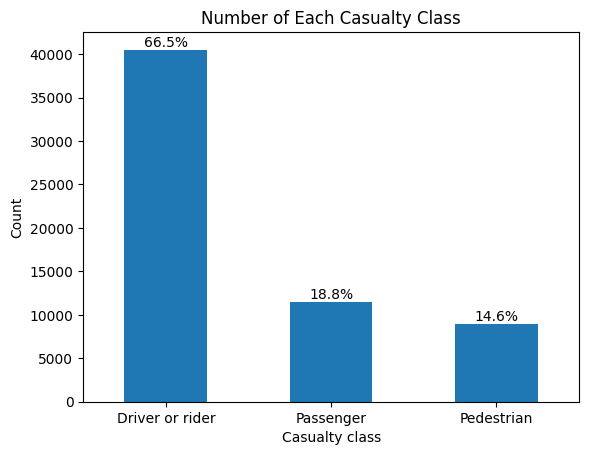

In [ ]:
# Plot the number of occurrences of each class in the 'casualty_class' column
class_counts = df['casualty_class'].value_counts()

# Calculate the percentage of each class
total = class_counts.sum()
percentages = (class_counts / total) * 100

# Define the names of the bars
bar_names = ['Driver or rider', 'Passenger', 'Pedestrian']

# Plot the bar chart
ax = class_counts.plot(kind='bar')
plt.xlabel('Casualty class')
plt.ylabel('Count')
plt.title('Number of Each Casualty Class')

# Set the names of the bars
plt.xticks(range(len(bar_names)), bar_names, rotation=0)

# Annotate the bars with percentages
for i, v in enumerate(class_counts):
    ax.text(i, v + 1, f'{percentages[i+1]:.1f}%', ha='center', va='bottom')

plt.show()